<a href="https://colab.research.google.com/github/VMaltaL/VMaltaL/blob/main/anomalia_mag_dipolo_Victoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calculo do campo magnético e da anomalia de um dipolo

In [1]:
! pip install verde xarray ipywidgets

In [2]:
!pip install ppigrf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import verde as vd
import ipywidgets
import ppigrf
import datetime

In [4]:
def angulos_para_xyz(inclinacao,declinacao,amplitude):
    """Converte angulos e amplitudes para as componentes do vetos.
    Angulos devem ser em graus"""
    x=amplitude*np.cos(np.radians(inclinacao))*np.cos(np.radians(declinacao))
    y=amplitude*np.cos(np.radians(inclinacao))*np.sin(np.radians(declinacao))
    z=amplitude*np.sin(np.radians(inclinacao))
    return x,y,z


In [5]:
#assert confere a função caso eu mude e confere se está tudo certo
#é recomendado fazer uns 5 testes
assert np.allclose(angulos_para_xyz(0,0,2),(2,0,0)),"Deu ruim"
assert np.allclose(angulos_para_xyz(90,0,2),(0,0,2)),"Deu ruim"

In [6]:
y = 0
x,z = vd.grid_coordinates(region=[-2000,2000,-1000,1000],spacing=130)

def mag_dipolo (x,y,z,inclinacao_m,declinacao_m,amplitude_m):
    mx, my, mz = angulos_para_xyz(inclinacao_m,declinacao_m,amplitude_m)
    mi0 = 1.25663706212e-6 #N.A^-2
    r = np.sqrt(x**2 + y**2 + z**2)
    mr = x * mx + y * my + z * mz
    bx = mi0 / (4*np.pi) * (3*mr *x / r**5 - mx / r**3) *1e9 #nT
    by = mi0 / (4*np.pi) * (3*mr *y / r**5 - my / r**3) *1e9 #nT
    bz = mi0 / (4*np.pi) * (3*mr *z / r**5 - mz / r**3) *1e9 #nT
    return bx, by, bz

bx, by, bz = mag_dipolo(x,y,z,inclinacao_m=-45, declinacao_m=0,amplitude_m=1e9)

In [7]:
janela = 300
#& combina os vetores booleanos -combina elemento a elemento
# fazendo essa mascara, conseguimos limpar onde não queremos
mask = (x > -janela) & (x < janela) & (z > -janela) & (z < janela)

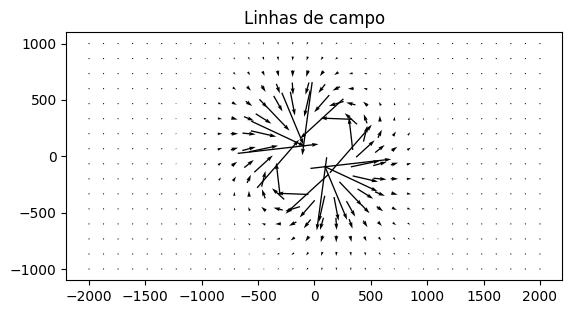

In [8]:
#vai pegar só os elementos verdadeiros
bz[mask] = np.nan #nan=not a number, não vai plotar os números, seria errado colocar 0 pois não é 0 de verdade
#plt.quiver plota as linhas de campo
#pivot coloca o meio do vetor na coordenada ao invés do fim
#scale tenta limpar os tamanhos dos vetores
plt.quiver(x, z, bx, bz, pivot="middle", scale=3e4)
plt.axis("scaled")
plt.title("Linhas de campo")
plt.show()


#Campo da Terra adicionada ao corpo

In [9]:
inclinacao_f = 23#inclinação do campo da Terra
declinacao_f = 0
amplitude_f = 1000
fx,fy,fz = angulos_para_xyz(inclinacao_f, declinacao_f, amplitude_f)

In [10]:
tx = fx + bx
ty = fy + by
tz = fz + bz

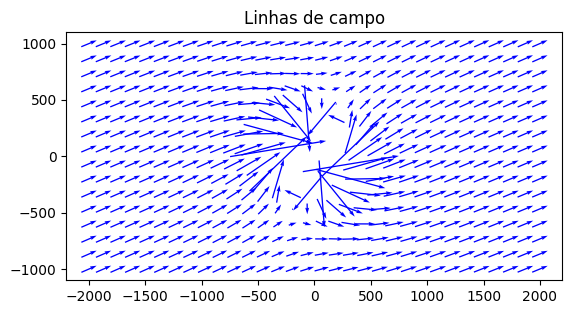

In [11]:
plt.quiver(x,z,tx,tz, pivot ="middle", scale=3e4, color= "blue")
plt.axis("scaled")
plt.title("Linhas de campo")
#a anomalia que espero ver de modT-modF será zero, negativa, zero, positiva e zero
plt.show()

In [12]:
y=0
z=-500
x=vd.line_coordinates(-2000,2000,spacing=50)

In [13]:
bx,by,bz = mag_dipolo(x,y,z, inclinacao_m=30, declinacao_m=0, amplitude_m=1e9)
fx,fy,fz = angulos_para_xyz(inclinacao=30, declinacao=0,amplitude=1)
anomalia = bx*fx + by*fy + bz*fz

#Perfis para diferentes altitudes

In [14]:
fx,fy,fz = angulos_para_xyz(inclinacao=30, declinacao=0,amplitude=1)

z=[]
anomalias_altitude=[]
for i in range(0,5):
    altura= -100-200 * i
    z.append(altura)
    bx,by,bz = mag_dipolo(x,y,altura, inclinacao_m=30, declinacao_m=0, amplitude_m=1e9)
    anomalia = bx*fx + by*fy + bz*fz
    anomalias_altitude.append(anomalia)

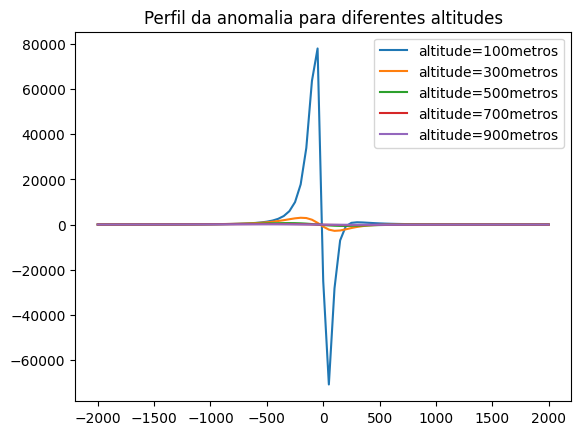

In [15]:
plt.figure()
for i in range(0,5):
    altura =- z[i]
    plt.plot(x,anomalias_altitude[i], label=f"altitude={altura}metros")
plt.legend()
plt.title("Perfil da anomalia para diferentes altitudes")
plt.show()

O que observo no gráfico é uma atenuação e espelhamento com o afastamento da altitude. O sinal perde a intensidade pois diminui com a distância como esperado para campos potenciais.

#Variando a inclinação do dipolo

In [16]:
y = 0
z = -500
x=vd.line_coordinates(-2000,2000,spacing=50)

#Perfil de anomalia do hemisfério norte

In [17]:
anomalias_incl = []
inclinacoes_dipolo_corpo = []
for i in range(-90,91,30):
    bx,by,bz = mag_dipolo(x,y,z, inclinacao_m=i, declinacao_m=0, amplitude_m=1e9)
    fx,fy,fz = angulos_para_xyz(inclinacao=i, declinacao=0,amplitude=1)
    anomalia = bx*fx + by*fy + bz*fz
    anomalias_incl.append(anomalia)
    inclinacoes_dipolo_corpo.append(i)

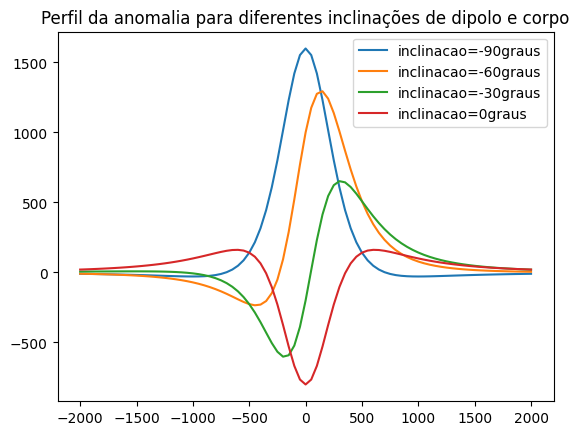

In [18]:
plt.figure()
for i in range(0,4):
    inclinacao_dipolo= inclinacoes_dipolo_corpo[i]
    plt.plot(x,anomalias_incl[i], label=f"inclinacao={inclinacao_dipolo}graus")
plt.legend()
plt.title("Perfil da anomalia para diferentes inclinações de dipolo e corpo")
plt.show()


#Perfil de anomalia do hemisfério sul

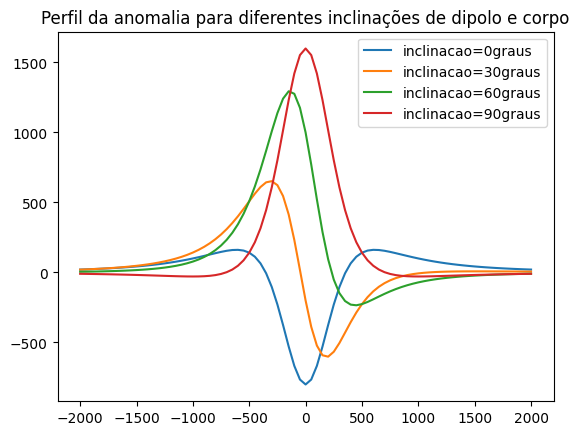

In [19]:
plt.figure()
for i in range(3,7):
    inclinacao_dipolo= inclinacoes_dipolo_corpo[i]
    plt.plot(x,anomalias_incl[i], label=f"inclinacao={inclinacao_dipolo}graus")
plt.legend()
plt.title("Perfil da anomalia para diferentes inclinações de dipolo e corpo")
plt.show()

Tanto no polo norte quanto no sul, a anomalia observada tem valores pequenos, um máximo e novamente valores pequenos.

No equador, tenho valores positivos, um mínimo negativo e novamente valores positivos. A intensidade do campo também diminui no equador. Por tanto, em valores absolutos, o valor da anomalia é menor no equador que nos polos.

Para o restante, no hemisfério norte, tenho valores negativos e um valor grande positivo depois disso. Já no hemisfério sul, tenho valores positivos grandes e depois valores negativos de menor magnitude.

Se eu encontro uma anomalia com positivo no norte e negativo no sul no hemisfério sul, é porque é uma rocha que veio do hemisfério norte e veio por tectônica de placas.

#Mapa da anomalia

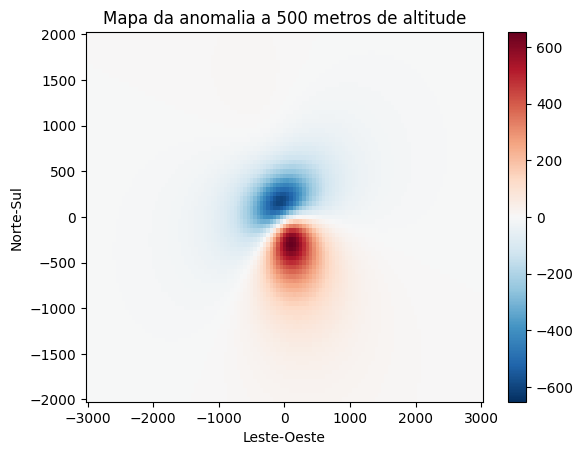

In [20]:
x, y = vd.grid_coordinates(region = [-2000, 2000, -3000, 3000], spacing=50)
z = -500

bx,by,bz = mag_dipolo(x, y, z, inclinacao_m = 30, declinacao_m = -20, amplitude_m = 1e9)
fx, fy, fz = angulos_para_xyz(inclinacao = 30, declinacao = -20, amplitude = 1)
anomalia = fx * bx + fy * by + fz * bz
escala = vd.maxabs(anomalia)
plt.pcolormesh(y, x, anomalia, cmap="RdBu_r", vmin=-escala, vmax=escala)
plt.title("Mapa da anomalia a 500 metros de altitude")
plt.xlabel("Leste-Oeste")
plt.ylabel("Norte-Sul")
plt.colorbar()

#Variando apenas a inclinação do dipolo

Medido com declinação e inclinação da cidade de São Paulo.

In [21]:
date = datetime.datetime(2023,11,18)
bx, by, bz = ppigrf.igrf(46.64, 23.55, 0, date)
norm_b = np.sqrt(bx[0]**2 + by[0]**2 +bz[0]**2)
I = np.arcsin(bz[0]/norm_b)
D = np.arctan2(by[0],bx[0])

In [22]:
x, y = vd.grid_coordinates(region = [-2000, 2000, -3000, 3000], spacing=50)
z = -500
def calcula_mapa(x,y,z):
    fx, fy, fz = angulos_para_xyz(inclinacao = I, declinacao = D, amplitude = 1)
    mapas = []
    inclinacoes_dipolo = [-90,-45,-30,-15,0,15,30,45,90]
    for i in range(len(inclinacoes_dipolo)):
        bx,by,bz = mag_dipolo(x, y, z, inclinacao_m = inclinacoes_dipolo[i], declinacao_m = -20, amplitude_m = 1e9)
        anomalia = fx * bx + fy * by + fz * bz
        mapas.append(anomalia)

    return mapas, inclinacoes_dipolo

In [23]:
mapas, inclinacoes_dipolo = calcula_mapa(x,y,z)

def plota_mapas(mapas, declinacoes_dipolo,x,y):
    plt.figure()
    fig, figura = plt.subplots(3,3, sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.5)
    k=0

    for i in range (3):
        for j in range(3):
            anomalia = mapas[k]
            escala = vd.maxabs(anomalia)
            figura[i,j].pcolormesh(y, x, anomalia, cmap="RdBu_r",vmin=-escala, vmax=escala)
            figura[i,j].set_title(f"{inclinacoes_dipolo[k]} graus")
            k+=1
    fig.suptitle("Mapas com diferentes declinações de dipolo")
    plt.show()

<Figure size 640x480 with 0 Axes>

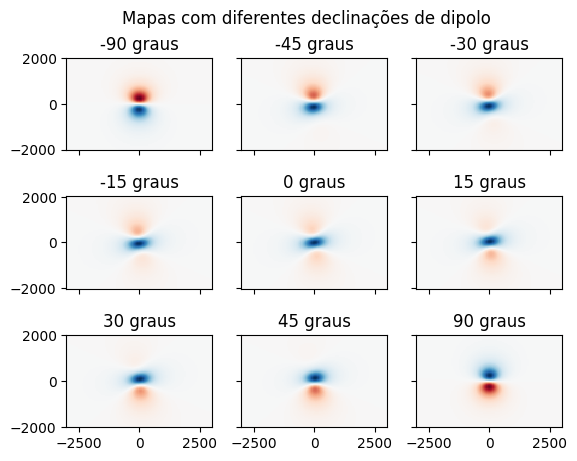

In [24]:
plota_mapas(mapas, inclinacoes_dipolo,x,y)

Entre -90 e -30 e 30 e 90, temos dipolo muito bem definidos, porém para valores de graus negativos, os valores positivos são vistos ao norte e para valores positivos de inclinação, temos valores positivos a sul.

Entre -15 e 15 graus, temos o valor negativo entre valores positivos menores em norte e sul.

In [25]:
y = 0
z = -500
x=vd.line_coordinates(-2000,2000,spacing=50)

In [26]:
anomalias_incl_dipolo = []
inclinacoes_dipolo = []
for i in range(-90,91,30):
    bx,by,bz = mag_dipolo(x,y,z, inclinacao_m=i, declinacao_m=0, amplitude_m=1e9)
    fx,fy,fz = angulos_para_xyz(inclinacao=I, declinacao=D,amplitude=1)
    anomalia = bx*fx + by*fy + bz*fz
    anomalias_incl_dipolo.append(anomalia)
    inclinacoes_dipolo.append(i)

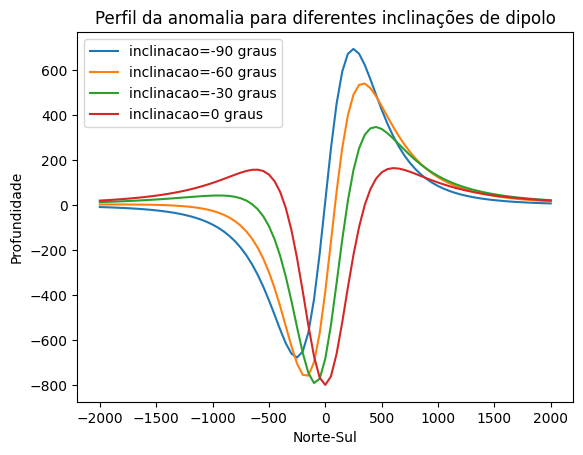

In [27]:
plt.figure()
for i in range(0,4):
    inclinacao_dipolo= inclinacoes_dipolo[i]
    plt.plot(x,anomalias_incl_dipolo[i], label=f"inclinacao={inclinacao_dipolo} graus")
plt.legend()
plt.title("")
plt.xlabel("Norte-Sul")
plt.ylabel("Profundidade")
plt.title("Perfil da anomalia para diferentes inclinações de dipolo")
plt.show()

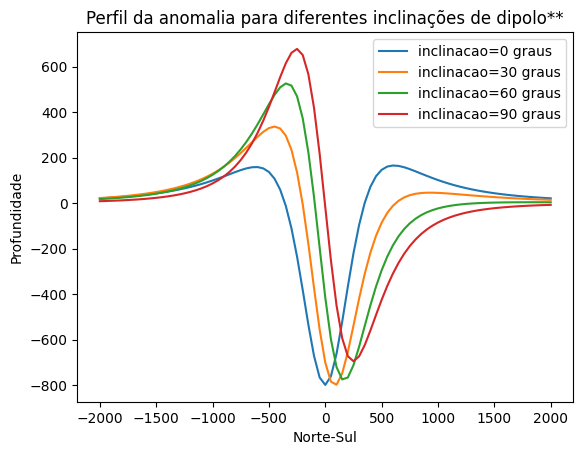

In [28]:
plt.figure()
for i in range(3,7):
    inclinacao_dipolo= inclinacoes_dipolo[i]
    plt.plot(x,anomalias_incl_dipolo[i], label=f"inclinacao={inclinacao_dipolo} graus")
plt.legend()
plt.xlabel("Norte-Sul")
plt.ylabel("Profundidade")
plt.title("Perfil da anomalia para diferentes inclinações de dipolo**")
plt.show()

Entre -90 e -60 graus, os perfis tem valor nulo, mínimo negativo, máximo positivo e nulo.

Em 30 graus, o comportamento é do tipo, zero, positivo pequeno em valores absolutos, mínimonegativo, positivo pequeno em valores absolutos e zero.

Do 0 a 90, os perfis tem valor igual a zero, máximo positivo, mínimo negativo e zero. Eles também vão se deslocando para a direita conforme os valores em grau aumentam, e têm um aumento em seus máximos positivos e diminuição em valores absolutos dos mínimos negativos.

#Usando o ipywidgets.interact() para gerar mapas e perfis com diferentes inclinações e declinações

In [29]:
@ipywidgets.interact(inc=(-90,91,10),dec=(-90,91,10))
def varia_inclinacoes(inc,dec):
    y = 0
    z = -500
    x=vd.line_coordinates(-2000,2000,spacing=50)
    bx,by,bz = mag_dipolo(x,y,z, inclinacao_m=inc, declinacao_m=dec, amplitude_m=1e9)
    fx,fy,fz = angulos_para_xyz(inclinacao=I, declinacao=D,amplitude=1)
    anomalia = bx*fx + by*fy + bz*fz
    plt.figure()
    plt.plot(x,anomalia)
    plt.ylim(-2000,2000)
    plt.title("Perfil para diferentes declinações e inclinações", fontsize=15)
    plt.show()

interactive(children=(IntSlider(value=0, description='inc', max=91, min=-90, step=10), IntSlider(value=0, desc…

In [30]:
@ipywidgets.interact(inc=(-90,91,10),dec=(-90,91,10))
def varia_inclinacoes(inc,dec):
    x, y = vd.grid_coordinates(region = [-2000, 2000, -3000, 3000], spacing=50)
    z = -500
    bx,by,bz = mag_dipolo(x,y,z, inclinacao_m=inc, declinacao_m=dec, amplitude_m=1e9)
    fx,fy,fz = angulos_para_xyz(inclinacao=30, declinacao=0,amplitude=1)
    anomalia = bx*fx + by*fy + bz*fz
    plt.figure()
    escala = vd.maxabs(anomalia)
    plt.pcolormesh(y, x, anomalia, cmap="RdBu_r",vmin=-escala, vmax=escala)
    plt.title("Mapa para diferentes declinações e inclinações", fontsize=15)
    plt.ylim(-2000,2000)
    plt.colorbar()
    plt.show()

interactive(children=(IntSlider(value=0, description='inc', max=91, min=-90, step=10), IntSlider(value=0, desc…